In [72]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from itertools import product


In [80]:
x = np.array([random.uniform(0, 1) for k in range(300)])
y = np.array([random.uniform(0, 1) for k in range(300)])

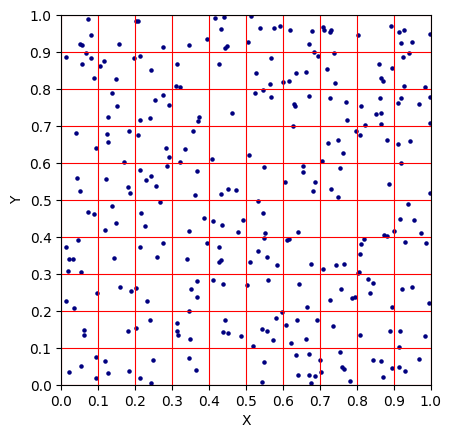

In [74]:
import matplotlib.ticker as ticker


plt.scatter(x, y, c="navy", s=5)

# Set the limits and labels for the plot
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel("X")
plt.ylabel("Y")

# Set the aspect ratio of the plot
plt.gca().set_aspect("equal")

# Customize the grid
plt.grid(color="red")

# Adjust the major_locator of the x and y axes
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))

# Show the plot
plt.show()

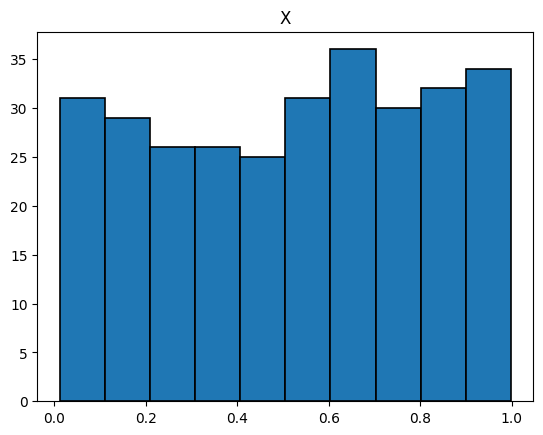

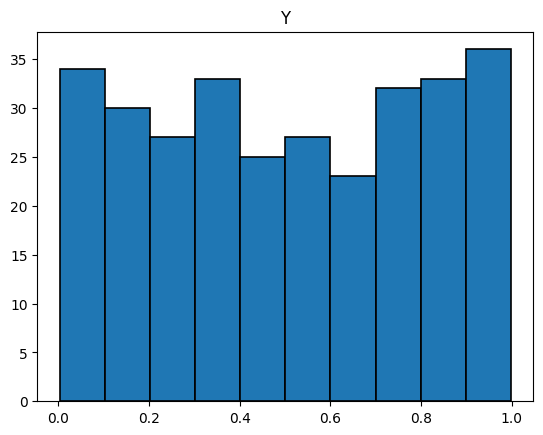

In [75]:
plt.hist(x, 10, edgecolor='black', linewidth=1.2)
plt.title("X")
plt.show()
plt.hist(y, 10, edgecolor='black', linewidth=1.2)
plt.title("Y")
plt.show()

In [82]:
def mutual(x, y, n_bins = 10) -> float:

    N = len(x)
    #2D histogram data because of automatic calculation of p(x,y)
    H, x_edges, y_edges = np.histogram2d(x, y, bins=n_bins)
    #Flattened histograms equal to hist(x), hist(y)
    Px = np.sum(H, axis=1) / N
    Py = np.sum(H, axis=0) / N
    Pxy = H / N
    MI = 0
    for i, j in product(range(n_bins), range(n_bins)):
        if Pxy[i,j] > 0: #Safeguard to prevent log(0)
            MI += Pxy[i,j] * np.log(Pxy[i,j] / (Px[i] * Py[j]))
    return MI

mutual(x, y)

0.13042255133952646

Generate 300 different values for MI and plot in a histogram:

Text(0, 0.5, 'Counts')

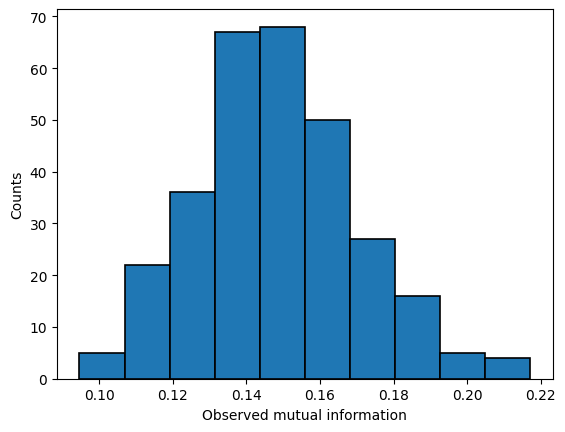

In [81]:
MI_values = np.empty(300)
for i in range(300):
    x_exp = np.array([random.uniform(0, 1) for k in range(300)])
    y_exp = np.array([random.uniform(0, 1) for k in range(300)])
    MI_values[i] = mutual(x_exp,y_exp)

plt.hist(MI_values, 10, edgecolor='black', linewidth=1.2)
plt.xlabel("Observed mutual information")
plt.ylabel("Counts")

In [94]:
def different_n(n):

    MI_values = np.empty(100)
    for i in range(100):
        x_exp = np.array([random.uniform(0, 1) for k in range(n)])
        y_exp = np.array([random.uniform(0, 1) for k in range(n)])
        MI_values[i] = mutual(x_exp,y_exp)
    return np.mean(MI_values)  

x_exp = np.linspace(50, 5000, 451)
y_exp = np.empty(len(x_exp))
for i, n in enumerate(x_exp):
    y_exp[i] = different_n(int(n))

Text(0, 0.5, 'Average mutual information')

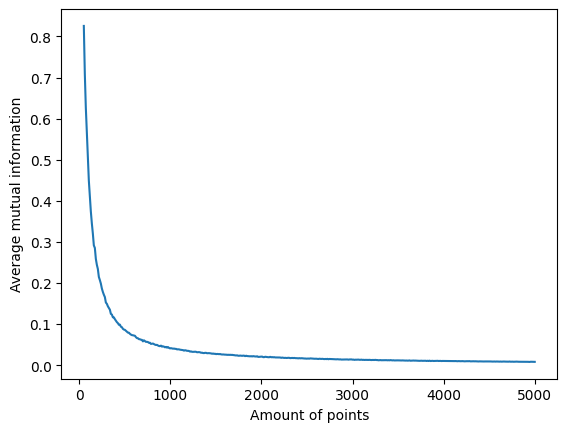

In [95]:
plt.plot(x_exp, y_exp)
plt.xlabel("Amount of points")
plt.ylabel("Average mutual information")

In [87]:
print(np.linspace(50, 500, 451))

[ 50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231.
 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244. 245.
 246. 